# Applied Machine Learning
## Practical Assignment 1

In [1]:
Names: ['Lucas Belderink', 'Rama Pamudji'] 
Studentnumbers: ['12151750', '11170220']

### Important Notes:
1. Submit through **Canvas** before 11:59pm on Tuesday, April 20, 2021.
2. No late homework will be accepted.
3. This is a **group-of-two** assignment; hence choose **one** partner to work with.
4. The submitted file should be in ipynb format
5. The assignment is worth 10 points
6. For questions, please use the discussion part of canvas (English only!)

### Software:
We will be using Python programming language throughout this course. Further we will be using:
+ IPython Notebooks (as an environment)
+ Numpy
+ Pandas
+ Scikit-learn


### Background:

This practical assignment will be covering linear regression and evaluation. For the assignment, please download a [dataset](https://drive.google.com/open?id=1rESPdl7CUfvgkA44YQ42pcOaMOCGN8B6) containing demographic information and crime statistics (in a given year) for some cities in the US.

Assume that for certain cities there is missing information about crimes, so we would like to learn how to estimate the number of non-violent crimes based on characteristics of the city (demographics, location etc).

In [2]:
import os
import sys

import numpy as np
import pandas as pd
import sklearn
from nose.tools import assert_count_equal, assert_equal
from numpy.testing import *
from pandas.testing import assert_frame_equal
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


## Part 1: Loading the data into a Pandas Data Frame [0.5 pts]

The descriptions of the columns of the dataset can be found here:

**pop**: population

**pctUrban**: percentage of people living in areas classified as urban

**medIncome**: Median Income

**pct12-29**: percentage of population that is 12-21 in age

**pct65up**: percentage of population that is 65 and over in age

**pctPoverty**: percentage of people under the poverty level

**pctAllDivorc**: percentage of population who are divorced

**pctUnemploy**: percentage of people 16 and over, in the labor force, and unemployed

**perHoush**: mean persons per household

**pctHousOccup**: percent of housing occupied

**persHomeless**: number of homeless people

**persEmergShelt**: number of people in homeless shelters

**nonViolPerPop**: total number of non-violent crimes per 100K popuation

**State**: the state in which this town/city is located

**countyCode**: the code number of the county of the state this town/city is located



### Question 1a:
Load the data into a Pandas DataFrame. At this point, make sure that you only load the following columns: 

`'pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 'pctPoverty', 'pctAllDivorc', 'pctUnemploy', 'perHoush', 'pctHousOccup', 'persHomeless', 'persEmergShelt', 'nonViolPerPop'`


In [3]:
csv_path = 'crime_data.csv'


In [4]:
# Load the dataset

### BEGIN SOLUTION
crime_data = pd.read_csv(csv_path)[['pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 'pctPoverty', 
                       'pctAllDivorc', 'pctUnemploy', 'perHoush', 'pctHousOccup', 'persHomeless', 
                       'persEmergShelt', 'nonViolPerPop']]
### END SOLUTION

print(crime_data.shape)
crime_data.head()


(949, 13)


,pop,pctUrban,medIncome,pct12-29,pct65up,pctPoverty,pctAllDivorc,pctUnemploy,perHoush,pctHousOccup,persHomeless,persEmergShelt,nonViolPerPop
0,11980.0,100.0,75122.0,21.44,11.33,1.96,4.47,2.70,3.10,98.37,0,11,1394.59
1,23123.0,100.0,NaN,21.30,17.18,3.98,5.42,2.43,2.82,97.15,0,0,1955.95
2,NaN,0.0,NaN,40.53,12.65,29.99,9.73,9.08,2.76,92.45,0,2,9988.79
3,28700.0,100.0,42805.0,27.41,14.42,4.01,7.64,4.85,2.60,95.11,0,0,1890.88
4,74111.0,100.0,NaN,35.16,8.58,13.68,8.64,4.18,2.46,95.07,15,125,4747.58


### Question 1b:
We want to predict the number of crimes. Identify the features X and the target variable Y, and turn the X and Y DataFrames into Numpy arrays.


In [5]:
X = crime_data[['pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 'pctPoverty', 
                'pctAllDivorc', 'pctUnemploy', 'perHoush', 'pctHousOccup', 'persHomeless', 
                'persEmergShelt']].to_numpy()

Y = crime_data['nonViolPerPop'].to_numpy()


## Part 2: Split the data into a training set and a test set [0.5 pts]
### Question 2:
Split the data into a training and a test set. Use a  70%-30% split.  
Print the number of examples in the training set and the test set.

In [6]:
X_train = 'Replace this string with the correct answer'
X_test = 'Replace this string with the correct answer'
Y_train = 'Replace this string with the correct answer'
Y_test = 'Replace this string with the correct answer'

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X.size)
print(X_train.size)
print(X_test.size)

print(X_train.size/X.size)
print(X_test.size/X.size)

print("\n")

print(Y.size)
print(Y_train.size)
print(Y_test.size)

print(Y_train.size/Y.size)
print(Y_test.size/Y.size)

### END SOLUTION

11388
7968
3420
0.6996838777660696
0.30031612223393045


949
664
285
0.6996838777660696
0.30031612223393045


## Part 3: Linear Regression [2 pts]

**Missing Data**: Often the data you are considering is incomplete. For example in some city, the number of homeless people might be unknown. In this case, if you look into the datasets you will find the value *NaN*. This is not a real value, hence Linear Regression cannot handle it.

The question is how can we handle missing data. There are many ways to do so, some more sophisticated than others. Here we will use a simple approach. This simple approach fills in the missing values, i.e. replaces the *NaN* by the median of the corresponding feature. E.g. if there is a *NaN* value for the population in one city, this *NaN* value will be replaced by the median number of the population in all other cities in the data.

In [7]:
# Fill in the missing data in the dataset (i.e. replace NaN values) 

def replace_nan_median(data):
    medians_data = np.nanmedian(data, axis = 0)
    
    for y in range(0, len(data[0])):
        for x in range(0, len(data)):
            if pd.isnull(data[x, y]):
                data[x, y] = medians_data[y]

replace_nan_median(X_train)
replace_nan_median(X_test)

### Question 3a:
Train a linear regression model

In [8]:
def train_linregmodel(X, Y):
    lr = linear_model.LinearRegression()    
    lr.fit(X, Y)
    
    return lr

linreg_model = train_linregmodel(X_train, Y_train)


coefs = pd.DataFrame()
coefs['feature'] = crime_data[['pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 'pctPoverty', 
                'pctAllDivorc', 'pctUnemploy', 'perHoush', 'pctHousOccup', 'persHomeless', 
                'persEmergShelt']].columns
coefs['coefficient'] = linreg_model.coef_

display(coefs)

,feature,coefficient
0,pop,-0.003027
1,pctUrban,7.574894
2,medIncome,0.009905
3,pct12-29,-17.271344
4,pct65up,22.175874
5,pctPoverty,136.218690
6,pctAllDivorc,369.578949
7,pctUnemploy,-121.199664
8,perHoush,493.756994
9,pctHousOccup,-37.212039


### Question 3b:
Compare the importance of features based on the parameters $\theta$ of the model. 

1. Which are the top-5 most important features for the predicting the number of crimes per capita?   
2. Out of those, which correlate positively and which negatively with the number of crimes in a region?

In [9]:
### BEGIN SOLUTION
coefs = coefs.reindex(coefs.coefficient.abs().sort_values(ascending = False).index)
display(coefs[:5])

top5 = coefs[:5]['feature']
top5.index = [1, 2, 3, 4, 5]

print(top5)
### END SOLUTION

,feature,coefficient
8,perHoush,493.756994
6,pctAllDivorc,369.578949
5,pctPoverty,136.218690
7,pctUnemploy,-121.199664
9,pctHousOccup,-37.212039


1        perHoush
2    pctAllDivorc
3      pctPoverty
4     pctUnemploy
5    pctHousOccup
Name: feature, dtype: object


<span style="color:blue">**Replace the text in this cell with your explanation (if needed)**</span>

### Question 3c:

Compute the Mean Absolute Error and Root Mean Squared Error, do this without using the scikit-learn API for these values.



In [26]:
from sklearn.metrics import mean_squared_error
prediction = linreg_model.predict(X_test)
actual_values = Y_test

def rmse(y_true, y_pred):
    if len(y_true) != len(y_pred):
        print("Inputs hebben niet dezelfde lengte")
        
    n = len(y_pred)

    squared_errors = 0
    for i in range(0, n):
        squared_errors += (y_true[i] - y_pred[i])**2
        
    mse = squared_errors/n    
    RMSE = mse**0.5
    
    return RMSE

print("rmse: ", rmse(actual_values, prediction))
test = mean_squared_error(actual_values, prediction)
print("Sklearn rmse: ", test**0.5)


rmse:  2375.864826477729
Sklearn rmse:  2375.864826477729


In [11]:
def mae(y_true, y_pred):

    if len(y_true) != len(y_pred):
        print("Inputs hebben niet dezelfde lengte")

    n = len(y_true)

    mean_errors = 0
    for i in range(0, n):
        mean_errors += np.absolute(y_true[i] - y_pred[i])

    MAE = mean_errors/n

    return MAE

mae(actual_values, prediction)

1286.4839271744945

### Question 3d:
MAE is an L1 error, while RMSE is an L2 error (L2 errors are based on the squared errors of each prediction in contrast to L1). Consider a scenario where having a relatively small deviation from the true value is ok, but you would really like to avoid making large errors in predictions. Which of those two metrics would you choose to evaluate your models? Explain.

<span style="color:blue">These large prediction errors (large deviations from the true values, so outliers) will be magnified if squared alongside the other errors. These large prediction errors will increase the eventual values that represent your deviation (in this case RMSE) by too much, causing the outliers to make the RMSE values to be unrepresentative of the actual overall deviaton.
If these outliers are present, L1 error would take them into account better than the squared errors method of L2.
</span>



## Part 4. Adding features [2 pts]
1. Add a number of features by including polynomials and interactions of different degree
2. Train and test the different linear regression models over the data
3. Test whether increasing the complexity of the model overfits the data

### Question 4a
Implement a function that constructs additional features by considering the polynomials of the original features along with their interactions. Degree is the degree of the polynomial.  
Consider the original dataset that was loaded into Pandas, and then turned into a Numpy array from Part 1.

In [12]:
def polynomial(X, degree):    
    X_poly = PolynomialFeatures(degree).fit(X)
    
    return X_poly

X_polynomial = polynomial(X_train, 2)
x_train = X_polynomial.transform(X_train)
x_test = X_polynomial.transform(X_test)

print(x_train, x_test)

dataset = pd.DataFrame(x_train)


# convert the array back to a dataframe
# dataset = pd.DataFrame(X_polynomial)
# summarize
print(X_train.shape)
print(dataset.shape)


[[1.0000e+00 1.4396e+04 1.0000e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.3030e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.4363e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.0000e+00 2.0999e+04 7.5480e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.8310e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 2.3748e+04 7.4450e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]] [[1.0000e+00 2.7244e+04 7.0760e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 2.2353e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.9600e+02]
 [1.0000e+00 1.7637e+04 1.0000e+02 ... 0.0000e+00 0.0000e+00 4.9000e+01]
 ...
 [1.0000e+00 4.7025e+04 1.0000e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 4.1856e+04 1.0000e+02 ... 1.0000e+00 1.1300e+02 1.2769e+04]
 [1.0000e+00 3.1287e+04 1.0000e+02 ... 0.0000e+00 0.0000e+00 6.4000e+01]]
(664, 12)
(664, 91)


### Question 4b:
Write your conclusions regarding the performance of the models of increasing complexity


Degree 1 RMSE:  1510.6666616747175

Degree 2 RMSE:  1225.4843223481769

Degree 3 RMSE:  1129.41599793932

Degree 4 RMSE:  1720.089943160478

Degree 5 RMSE:  1838.9343590347542

Degree 1 R^2:  0.5200539500927231

Degree 2 R^2:  0.6841574401025243

Degree 3 R^2:  0.7317356257194367

Degree 4 R^2:  0.3777606889740156

Degree 5 R^2:  0.2888068152050385


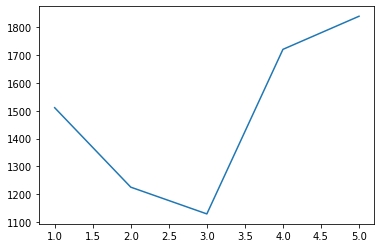

In [13]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib as mpl

# Generate polynomial dataset (both training and test) of degrees 1, 2, 3, 4, 5
# ////////////////////////////////////////////////////////////////////////////////////////////////
'''DEGREE 1'''
X_poly1 = polynomial(X_train, 1)
X_trainpoly1 = X_poly1.transform(X_train)
X_testpoly1 = X_poly1.transform(X_test)

'''DEGREE 2'''
X_poly2 = polynomial(X_train, 2)
X_trainpoly2 = X_poly2.transform(X_train)
X_testpoly2 = X_poly2.transform(X_test)

'''DEGREE 3'''
X_poly3 = polynomial(X_train, 3)
X_trainpoly3 = X_poly3.transform(X_train)
X_testpoly3 = X_poly3.transform(X_test)

'''DEGREE 4'''
X_poly4 = polynomial(X_train, 4)
X_trainpoly4 = X_poly4.transform(X_train)
X_testpoly4 = X_poly4.transform(X_test)

'''DEGREE 5'''
X_poly5 = polynomial(X_train, 5)
X_trainpoly5 = X_poly5.transform(X_train)
X_testpoly5 = X_poly5.transform(X_test)

# Scale all features using the RobustScaler
# ////////////////////////////////////////////////////////////////////////////////////////////////
'''DEGREE 1'''
X_trainscaledpolytransformer1 = RobustScaler().fit(X_trainpoly1)
X_trainscaledpoly1 = X_trainscaledpolytransformer1.transform(X_trainpoly1)

# X_testscaledpolytransformer1 = RobustScaler().fit(X_testpoly1)
# X_testscaledpoly1 = X_testscaledpolytransformer1.transform(X_testpoly1)

# print(X_trainscaledpoly1)
# print(len(X_testscaledpoly1))

'''DEGREE 2'''
X_trainscaledpolytransformer2 = RobustScaler().fit(X_trainpoly2)
X_trainscaledpoly2 = X_trainscaledpolytransformer2.transform(X_trainpoly2)

X_testscaledpolytransformer2 = RobustScaler().fit(X_testpoly2)
X_testscaledpoly2 = X_testscaledpolytransformer2.transform(X_testpoly2)

'''DEGREE 3'''
X_trainscaledpolytransformer3 = RobustScaler().fit(X_trainpoly3)
X_trainscaledpoly3 = X_trainscaledpolytransformer3.transform(X_trainpoly3)

X_testscaledpolytransformer3 = RobustScaler().fit(X_testpoly3)
X_testscaledpoly3 = X_testscaledpolytransformer3.transform(X_testpoly3)

'''DEGREE 4'''
X_trainscaledpolytransformer4 = RobustScaler().fit(X_trainpoly4)
X_trainscaledpoly4 = X_trainscaledpolytransformer4.transform(X_trainpoly4)

X_testscaledpolytransformer4 = RobustScaler().fit(X_testpoly4)
X_testscaledpoly4 = X_testscaledpolytransformer4.transform(X_testpoly4)

'''DEGREE 5'''
X_trainscaledpolytransformer5 = RobustScaler().fit(X_trainpoly5)
X_trainscaledpoly5 = X_trainscaledpolytransformer5.transform(X_trainpoly5)

X_testscaledpolytransformer5 = RobustScaler().fit(X_testpoly5)
X_testscaledpoly5 = X_testscaledpolytransformer5.transform(X_testpoly5)


# Compute and print RMSE using your code above on the training set and on the test set
# ////////////////////////////////////////////////////////////////////////////////////////////////
'''DEGREE 1'''
X_model1 = train_linregmodel(X_trainscaledpoly1, Y_train)
X_predictions1 = X_model1.predict(X_trainscaledpoly1)
X_rmse1 = rmse(Y_train, X_predictions1)
print("\nDegree 1 RMSE: ", X_rmse1)

'''DEGREE 2'''
X_model2 = train_linregmodel(X_trainscaledpoly2, Y_train)
X_predictions2 = X_model2.predict(X_trainscaledpoly2)
X_rmse2 = rmse(Y_train, X_predictions2)
print("\nDegree 2 RMSE: ", X_rmse2)

'''DEGREE 3'''
X_model3 = train_linregmodel(X_trainscaledpoly3, Y_train)
X_predictions3 = X_model3.predict(X_trainscaledpoly3)
X_rmse3 = rmse(Y_train, X_predictions3)
print("\nDegree 3 RMSE: ", X_rmse3)

'''DEGREE 4'''
X_model4 = train_linregmodel(X_trainscaledpoly4, Y_train)
X_predictions4 = X_model4.predict(X_trainscaledpoly4)
X_rmse4 = rmse(Y_train, X_predictions4)
print("\nDegree 4 RMSE: ", X_rmse4)

'''DEGREE 5'''
X_model5 = train_linregmodel(X_trainscaledpoly5, Y_train)
X_predictions5 = X_model5.predict(X_trainscaledpoly5)
X_rmse5 = rmse(Y_train, X_predictions5)
print("\nDegree 5 RMSE: ", X_rmse5)

# Compute and print R^2 on the training set and on the test set
# ////////////////////////////////////////////////////////////////////////////////////////////////
'''DEGREE 1'''
X_rsq1 = r2_score(Y_train, X_predictions1)
print("\nDegree 1 R^2: ", X_rsq1)

'''DEGREE 2'''
X_rsq2 = r2_score(Y_train, X_predictions2)
print("\nDegree 2 R^2: ", X_rsq2)

'''DEGREE 3'''
X_rsq3 = r2_score(Y_train, X_predictions3)
print("\nDegree 3 R^2: ", X_rsq3)

'''DEGREE 4'''
X_rsq4 = r2_score(Y_train, X_predictions4)
print("\nDegree 4 R^2: ", X_rsq4)

'''DEGREE 5'''
X_rsq5 = r2_score(Y_train, X_predictions5)
print("\nDegree 5 R^2: ", X_rsq5)

# Generate a plot with the x-axis representing the complexity of the model (i.e. the degree of the polynomial features)
# Make the degree range from 1 to 5. The y-axis should represent the RMSE. Plot a line for degree = 1, 2, 3, 4, and 5
# for the training error and the test error.
# ////////////////////////////////////////////////////////////////////////////////////////////////
plt.plot([1, 2, 3, 4, 5], [X_rmse1, X_rmse2, X_rmse3, X_rmse4, X_rmse5])



<span style="color:blue">As visible in the plot, the model that gives the most accurate predictions seems to be the
third degree polynomial. This model gives the lowest RMSE and the R^2 closest to 1.
As the polynomial degree increases past 3 the model starts to overfit and the error increases.
</span>

## Part 5. Regularization [2pts]

1. Feature selection using regularization
2. Training/validation/test split
3. Find the optimal parameter for the regularizer
4. Compare linear regression with and without regularization

### Question 5a:
Create a function that applies regularization, choose the \lambda parameter (i.e. the alpha in python) equal to 500.

In [14]:
def regularization(X, Y, lambd = 500):
    model = linear_model.Ridge(alpha = lambd)
    model.fit(X, Y)

    return model


### Question 5b:
Compare the performance of the linear regression with and without regularization. Use the 2 degree polynomial features constructed at question 4b.

In [15]:
# Apply the function from 5a for feature selection

### BEGIN SOLUTION
regu_model = regularization(X_trainscaledpoly2, Y_train)
regu_model.predict(X_testscaledpoly2)
### END SOLUTION

D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09543e-17): result may not be accurate.
  overwrite_a=True).T


array([  2848.32421789,   3070.863629  ,   5482.55079117,   3740.41434829,
         2749.08510722,   2930.82899465,   3603.7364463 ,   5024.70042872,
         5075.43961665,   4482.42873864,   5833.2790964 ,   3747.41845701,
         2061.88922011,   3605.52512992,   3311.02862537,   2203.45080819,
         3429.85491741,   3442.55319103,   2924.533614  ,   7430.71083203,
         3359.48967959,   4232.1176464 ,   3561.59630757,   6493.5591696 ,
         3291.45307856,   3013.7638149 ,   1632.50905363,   2097.73341236,
         4707.12681954,   3891.74967663,   1900.57544878,   2791.38350109,
         4542.68401412,   4317.61213261,   3536.4636647 ,   2564.60330595,
         2963.73214419,   2976.43922669,   2723.19753161,   2746.40386529,
         2066.1152816 ,   5632.13822039,   2692.2326963 ,   3333.66535334,
         3509.17625767,   2333.77353887,   4993.22039548,   7830.71635616,
         4924.25825636,   5603.73666727,   3052.96452287,   3077.99665842,
         5070.27601857,  

In [16]:
# Compare the training and test RMSE of the linear regression with and without regularization

### BEGIN SOLUTION
print("Non-regularized degree 2 polynomial RMSE")

print("Train: ", X_rmse2)

X_testscaledpolytransformer2 = RobustScaler().fit(X_testpoly2)
X_testscaledpoly2 = X_testscaledpolytransformer2.transform(X_testpoly2)
X_predictions2test = X_model2.predict(X_testscaledpoly2)
X_rmse2test = rmse(Y_test, X_predictions2test)

print("Test:  ", X_rmse2test)

train_pred_reg = regu_model.predict(X_trainscaledpoly2)
test_pred_reg = regu_model.predict(X_testscaledpoly2)

# rmse(y_true, y_pred)
# mae(y_true, y_pred)

print("\nRegularized: ")
'''Train RMSE'''
print("Train: ", rmse(Y_train, train_pred_reg))

'''Test RMSE'''
print("Test:  ", rmse(Y_test, test_pred_reg))



### END SOLUTION

Non-regularized degree 2 polynomial RMSE
Train:  1225.4843223481769
Test:   9174.154087499555

Regularized: 
Train:  1376.2639063279169
Test:   9085.741464476292


In [29]:
# Identify how many features were selected (i.e. had a non-zero parameter \theta) by the regularized model

### BEGIN SOLUTION
i = 0
for feature in regu_model.coef_:
    if feature != 0:
        i += 1
    else:
        print("Found unselected feature")

print("Number of features before selection: ", len(X_model2.coef_))
print("Number of selected features ", i)
### END SOLUTION

Found unselected feature
Number of features before selection:  91
Number of selected features  90


<span style="color:blue">The regularized model seems to work slightly worse using the training data. However, it also seems to predict more accurately for unseen data, since the RMSE for the predictions using test data with the regularized model is slightly lower.</span>

### Question 5c:
Compare the coefficients (i.e. the parameters \theta) of the linear regression models with and without regularization.
Plot them in a graph, where the x-axis is the index of a coefficient while the y-axis the magnitute of it. 
What do you observe?

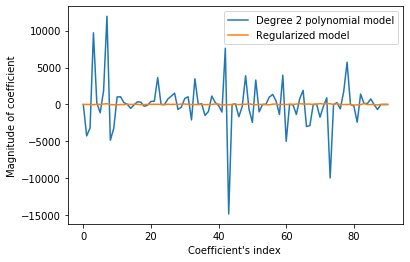

In [18]:
# Plot the graph here

### BEGIN SOLUTION
plt.plot(range(0, len(X_model2.coef_)), X_model2.coef_, label = 'Degree 2 polynomial model')
plt.plot(range(0, len(regu_model.coef_)), regu_model.coef_, label = 'Regularized model')

plt.xlabel('Coefficient\'s index ')
plt.ylabel('Magnitude of coefficient')

plt.legend()

plt.show()
### END SOLUTION

<span style="color:blue">The coefficients of the 2nd degree polynomial show high variance (showing values between over 10000 and under -10000). After regularizing, the values show far less variance compared to the non-regularized model.</span>

## Part 6: Categorical features [3 pts]

Load again the entire dataset, without selecting specific features as you did in Part 1. The dataset now contains both *numerical* and *categorical* features.

In [30]:
df = pd.read_csv(csv_path, sep=',', header = 0,
                )

df.dropna(subset=['nonViolPerPop'],axis=0, inplace=True)

display(df)

,State,perHoush,pct12-29,pct65up,pctUrban,pctPoverty,pctUnemploy,pctAllDivorc,pctHousOccup,persEmergShelt,persHomeless,nonViolPerPop,medIncome,pop,countyCode
0,NJ,3.10,21.44,11.33,100.00,1.96,2.70,4.47,98.37,11,0,1394.59,75122.0,11980.0,39.0
1,PA,2.82,21.30,17.18,100.00,3.98,2.43,5.42,97.15,0,0,1955.95,NaN,23123.0,45.0
2,MN,2.76,40.53,12.65,0.00,29.99,9.08,9.73,92.45,2,0,9988.79,NaN,NaN,7.0
3,MA,2.60,27.41,14.42,100.00,4.01,4.85,7.64,95.11,0,0,1890.88,42805.0,28700.0,21.0
4,ND,2.46,35.16,8.58,100.00,13.68,4.18,8.64,95.07,125,15,4747.58,NaN,74111.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,MA,2.49,27.70,16.06,99.75,14.28,9.93,10.52,92.39,62,1,1623.79,22452.0,92703.0,5.0
945,NJ,2.71,26.72,8.78,60.02,4.58,4.51,12.26,90.52,0,0,5835.29,37594.0,24544.0,1.0
946,CT,2.54,27.72,13.39,100.00,6.06,5.45,10.93,93.85,64,0,5144.94,35723.0,NaN,9.0
947,ND,2.56,24.03,12.99,0.00,14.46,5.88,9.20,84.38,0,0,3817.93,22407.0,13131.0,105.0


### Question 6a:
Look at the description of the features. Which of the features are or should be treated as categorical? Add the column names in a list.

In [31]:
### BEGIN SOLUTION
categorical_features = ['State', 'countyCode']
### END SOLUTION

### Question 6b [Research]:
Impute values using the median, on the entire dataset (regardless of train/test split). 
Does it make sense to impute values for all missing features? If yes, do so. Otherwise explain and drop rows containing missing values you can't replace.

Hint: If you want to impute missing values only for some specific columns, you can refer to this link: https://stackoverflow.com/questions/38584184/imputer-on-some-dataframe-columns-in-python

In [32]:
from sklearn.impute import SimpleImputer

def check_for_nan(df):
    for col in df:
        for item in df[col]:
            if pd.isna(item):
                print("Found nan value in ", col)
                break

check_for_nan(df)

# Impute median on rows found to have NaN values
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
q = imp_median.fit_transform(df[['pop', 'medIncome']]).T
df['pop'] = q[0]
df['medIncome'] = q[1]

# Drop rows with NaN countyCode entries
df = df.dropna(subset = ['countyCode'])
check_for_nan(df)


Found nan value in  medIncome
Found nan value in  pop
Found nan value in  countyCode


<span style="color:blue">In this example of categorical features it does not make sense to impute all missing features. In the case of the countyCode, some states have more counties than other states. If the median of the countyCode of all states is 40 but a state only has less than 40 counties it is impossible to fill the missing feature with that median.</span>

### Question 6c:
Have another look at the data, specifically the two new added features. Do you consider them useful/meaningful predictors for a (linear) Logistic Regression model? Explain.

Can you think of doing something that can help a linear model take advantage of some additional information? If so, implement your solution.


In [33]:
### BEGIN SOLUTION



### END SOLUTION

<span style="color:blue">We can use non-continuous variables in our model features by using one-hot encoding for example. This can give more insight into the importance of these variables.</span>

### Question 6d:
One hot encode the categorical features, then merge them back into the original dataframe/array.

In [34]:
### BEGIN SOLUTION
state = pd.get_dummies(df.State)
df = df.join(state)

countycode = pd.get_dummies(df.countyCode)
df = df.join(countycode)

display(df)

df = df.drop(columns=['State', 'countyCode'])
### END SOLUTION

,State,perHoush,pct12-29,pct65up,pctUrban,pctPoverty,pctUnemploy,pctAllDivorc,pctHousOccup,persEmergShelt,...,750.0,760.0,770.0,775.0,790.0,800.0,810.0,820.0,830.0,840.0
0,NJ,3.10,21.44,11.33,100.00,1.96,2.70,4.47,98.37,11,...,0,0,0,0,0,0,0,0,0,0
1,PA,2.82,21.30,17.18,100.00,3.98,2.43,5.42,97.15,0,...,0,0,0,0,0,0,0,0,0,0
2,MN,2.76,40.53,12.65,0.00,29.99,9.08,9.73,92.45,2,...,0,0,0,0,0,0,0,0,0,0
3,MA,2.60,27.41,14.42,100.00,4.01,4.85,7.64,95.11,0,...,0,0,0,0,0,0,0,0,0,0
4,ND,2.46,35.16,8.58,100.00,13.68,4.18,8.64,95.07,125,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,MA,2.49,27.70,16.06,99.75,14.28,9.93,10.52,92.39,62,...,0,0,0,0,0,0,0,0,0,0
945,NJ,2.71,26.72,8.78,60.02,4.58,4.51,12.26,90.52,0,...,0,0,0,0,0,0,0,0,0,0
946,CT,2.54,27.72,13.39,100.00,6.06,5.45,10.93,93.85,64,...,0,0,0,0,0,0,0,0,0,0
947,ND,2.56,24.03,12.99,0.00,14.46,5.88,9.20,84.38,0,...,0,0,0,0,0,0,0,0,0,0


### Question 6e:
Follow the instructions in the cell below. Due to randomization of the train_test_split, results might change. Make sure to **run the same code a few times** and understand what is happening.

In [35]:
from sklearn.preprocessing import StandardScaler, Normalizer

# Split the dataset into training, validation and test sets:
# Training set: 10% of the entire set
# Make the remaining 10% a validation dataset and the rest a test set.

### BEGIN SOLUTION ###
X = df.loc[:, df.columns != 'nonViolPerPop'].to_numpy()
Y = df['nonViolPerPop'].to_numpy()

ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1

# Produces test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(
    X, Y, test_size = ratio_test)

# Adjusts val ratio according to remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_adj = ratio_val / ratio_remaining

# Make train and val splits.
x_train, x_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size = ratio_adj)

print(df.size)
print(x_train.size + y_train.size)
print(x_val.size + y_val.size)
print(x_test.size + y_test.size)
### END SOLUTION ###


# Normalize all features based on the training and validation set combined.

### BEGIN SOLUTION ###
from sklearn.preprocessing import Normalizer

val_and_train = np.vstack((x_train, x_val))

transformer = Normalizer().fit(val_and_train)
x_train_norm = transformer.transform(x_train)
x_val_norm = transformer.transform(x_val)
x_test_norm = transformer.transform(x_test)
### END SOLUTION ###


# Train a linear regression model on the training and validation set combined. 
# Calculate the error on the training set and the test set.

### BEGIN SOLUTION ###
val_and_train_norm = np.vstack((x_train_norm, x_val_norm))

expected_values = np.append(y_train, y_val)

model = train_linregmodel(val_and_train_norm, expected_values)
train_predictions = model.predict(x_train_norm)
test_predictions = model.predict(x_test_norm)

rsq_train = r2_score(y_train, train_predictions)
rmse_train = rmse(y_train, train_predictions)
print("Errors for Train: ")
print("R^2: ", rsq_train)
print("RMSE: ", rmse_train)

rsq_test = r2_score(y_test, test_predictions)
rmse_test = rmse(y_test, test_predictions)
print("Errors for test: ")
print("R^2: ", rsq_test)
print("RMSE: ", rmse_test)
### END SOLUTION ###


# Train a regularized model (use Ridge regularization). To decide the parameter alpha, use a range of values to train,
# the model. Test its performance on the validation set. Output the RMSE for different values of alpha, and choose the
# best value.

### BEGIN SOLUTION ###
lambdalist = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 170, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

lambdaeffects = pd.DataFrame()
lambdaeffects['lambda'] = lambdalist

rsqs = []
rmses = []
for lmbd in lambdalist:
    reg_model = regularization(x_train, y_train, lmbd)
    reg_predictions = reg_model.predict(x_val)

    rsq_reg = r2_score(y_val, reg_predictions)
    rmse_reg = rmse(y_val, reg_predictions)
    
    rsqs.append(rsq_reg)
    rmses.append(rmse_reg)
    
lambdaeffects['R^2'] = rsqs
lambdaeffects['RMSE'] = rmses
### END SOLUTION ###


# Train the regularized model (use Ridge regularization) with the best alpha parameter found above on the traing and 
# validation set combined.

### BEGIN SOLUTION ###
top_lambdas = lambdaeffects.reindex(lambdaeffects.RMSE.abs().sort_values(ascending = True).index)
top_lambdas.index = range(0, len(top_lambdas))
display(top_lambdas)
print(top_lambdas['lambda'][0])

best_model = regularization(x_train, y_train, top_lambdas['lambda'][0])
best_predictions = best_model.predict(np.vstack((x_train, x_val)))
best_expected = np.append(y_train, y_val)

best_rsq = r2_score(best_expected, best_predictions)
best_rmse = rmse(best_expected, best_predictions)
print("Performance for best test with Regularization: ")
print("R^2: ", best_rsq)
print("RMSE: ", best_rmse)

print("Performance without regularization : ")
print("R^2: ", rsq_train)
print("RMSE: ", rmse_train)
### END SOLUTION ###


# Compare the performance of the linear regression with and without regularization



136308
108928
13616
13764
Errors for Train: 
R^2:  0.5448827639643462
RMSE:  1545.7796673073028
Errors for test: 
R^2:  0.4310005071911249
RMSE:  1708.311816427893


,lambda,R^2,RMSE
0,3,0.453860,1924.872392
1,2,0.453561,1925.397905
2,4,0.453468,1925.562943
3,5,0.452886,1926.586974
4,6,0.452271,1927.670750
5,7,0.451673,1928.721786
6,8,0.451111,1929.710419
7,9,0.450587,1930.630472
8,1,0.450511,1930.764408
9,10,0.450101,1931.484655


3
Performance for best test with Regularization: 
R^2:  0.5047196567588331
RMSE:  1642.5112622995327
Performance without regularization : 
R^2:  0.5448827639643462
RMSE:  1545.7796673073028


### Question 6f:
What are your conclusions for the two models compared? Which model should you choose over the two? Is hyperparameter tuning useful in this case?

<span style="color:blue">The performance of the model without regularization seems to consistently outperform the model with regularization. For this specific case, the non-regularized model seems to be the better choice. Hyperparameter tuning is useful, since it results in the lambda value which gives the best performing model. However the regularized model is outperformed in this case, making hyperparameter tuning unnecessary.</span>